In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os

n = 1

img = f"./CrackForest-dataset/image/00{n}.jpg"
seg = f"./CrackForest-dataset/seg/00{n}.seg"
mat = f"./CrackForest-dataset/groundTruth/00{n}.mat"

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


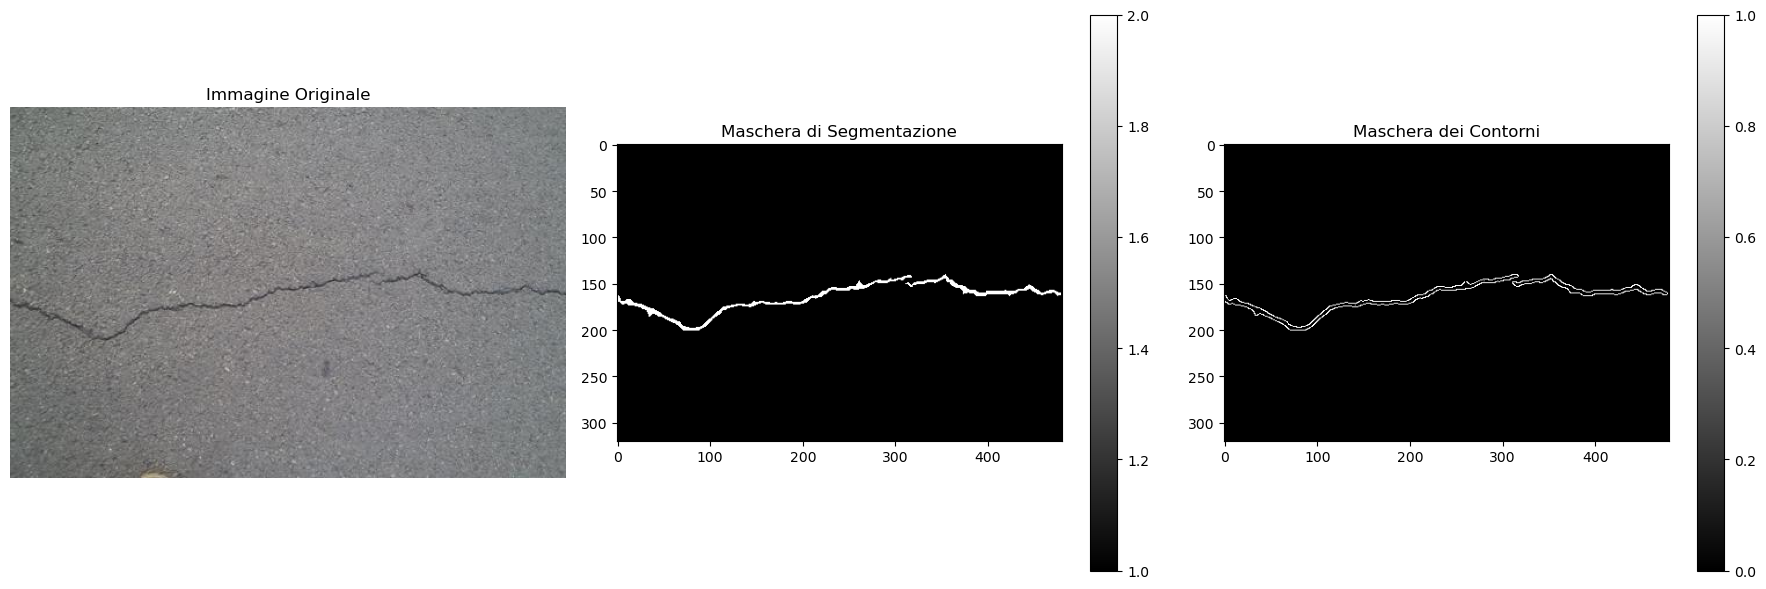

In [2]:
# Percorso del file .mat
mat_file_path = mat

# Carica il file .mat
data = scipy.io.loadmat(mat_file_path)

# Accedi alla chiave 'groundTruth' e analizza la sua struttura
ground_truth = data.get('groundTruth')


# Carica l'immagine originale
original_image = cv2.imread(img, cv2.IMREAD_COLOR)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Converti in RGB per Matplotlib

# Estrai i dati di 'Segmentation' e 'Boundaries'
segmentation = ground_truth[0, 0][0]
boundaries = ground_truth[0, 0][1]

# Crea una figura con tre subplot affiancati
plt.figure(figsize=(18, 6))

# Mostra l'immagine originale
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Immagine Originale")
plt.axis('off')  # Rimuove gli assi

# Mostra la maschera di segmentazione
plt.subplot(1, 3, 2)
plt.imshow(segmentation, cmap='gray')
plt.title("Maschera di Segmentazione")
plt.colorbar()

# Mostra la maschera dei contorni
plt.subplot(1, 3, 3)
plt.imshow(boundaries, cmap='gray')
plt.title("Maschera dei Contorni")
plt.colorbar()

# Mostra le immagini
plt.tight_layout()
plt.show()


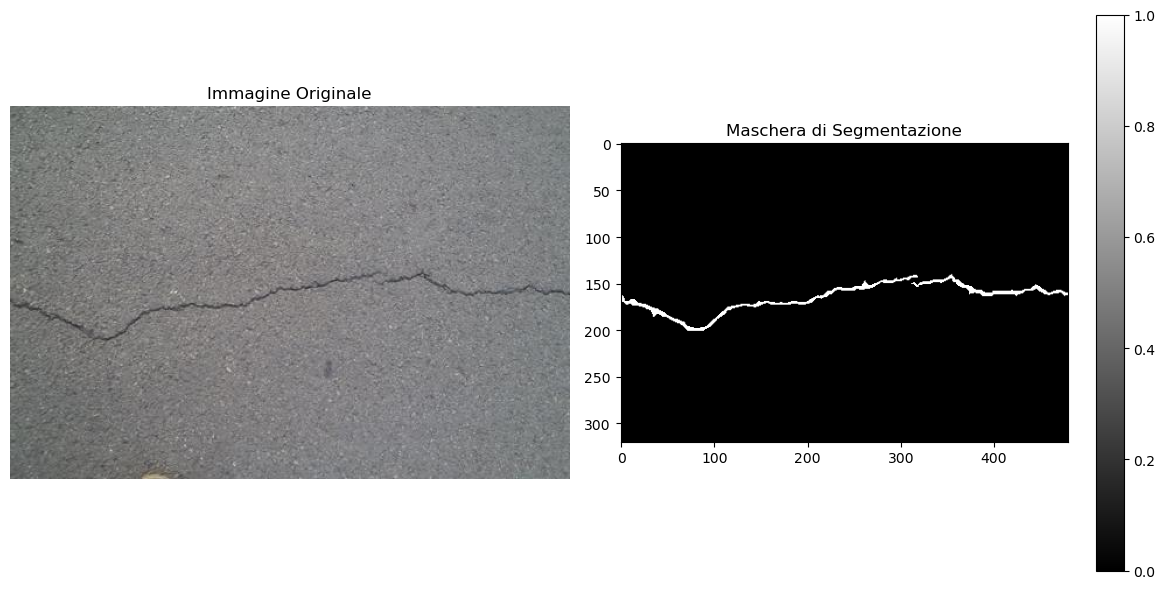

In [3]:
# Carica l'immagine originale
original_image = cv2.imread(img, cv2.IMREAD_COLOR)
if original_image is None:
    raise FileNotFoundError(f"Immagine non trovata al percorso {img}")
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Converti in RGB per Matplotlib

# Inizializza la maschera in base alle dimensioni definite nei metadati
width, height = 480, 320  # Dimensioni definite nei metadati
mask = np.zeros((height, width), dtype=np.uint8)  # Maschera binaria

# Leggi il file .seg
with open(seg, 'r') as file:
    lines = file.readlines()

# Trova la sezione 'data'
data_start_idx = None
for i, line in enumerate(lines):
    if line.strip().lower() == "data":
        data_start_idx = i + 1
        break

if data_start_idx is None:
    raise ValueError("La sezione 'data' non è stata trovata nel file .seg.")

# Elabora i dati successivi
data_lines = lines[data_start_idx:]
for line in data_lines:
    parts = list(map(int, line.split()))
    if len(parts) == 4:
        label, row, start_col, end_col = parts
        # Aggiorna la maschera con i pixel specificati
        mask[row, start_col:end_col + 1] = label

# Visualizza l'immagine originale e la maschera affiancate
plt.figure(figsize=(12, 6))

# Immagine originale
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Immagine Originale")
plt.axis('off')  # Nascondi gli assi

# Maschera di segmentazione
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Maschera di Segmentazione")
plt.colorbar()

# Mostra le immagini
plt.tight_layout()
plt.show()
